<a href="https://colab.research.google.com/github/ekansh2004/Calorie-Prediction/blob/main/CaloriePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

processed_data_path = '/content/drive/My Drive/processed_calorie_data.csv'
data = pd.read_csv(processed_data_path)

Mounted at /content/drive


In [3]:
X = data.drop('Calories_Burned', axis=1)
y = data['Calories_Burned']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [6]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2265.86
R² Score: 0.97


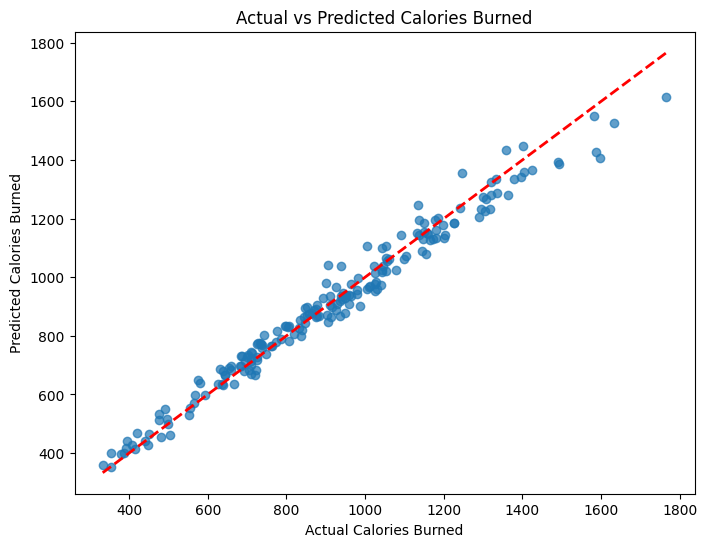

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs Predicted Calories Burned')
plt.show()